In [63]:
# 线性回归
# 房价预测

In [64]:
import matplotlib.pyplot as plt
import random
import torch

In [65]:
def synthetic_data(w,b,num_examples):
    """生成y=Xw+b+噪音"""
    X=torch.normal(0,1,(num_examples,len(w)))
    y=torch.matmul(X,w)+b
    y+=torch.normal(0,0.01,y.shape)
    return X,y.reshape((-1,1))

true_w=torch.tensor([2,-3.4])
true_b=4.2
features,labels=synthetic_data(true_w,true_b,1000)

In [66]:
features,labels

(tensor([[-0.4157,  0.8411],
         [-0.8830,  0.0729],
         [-0.5975, -1.1498],
         ...,
         [-1.0061,  1.1098],
         [ 0.5447, -1.1250],
         [-0.3926, -0.9863]]),
 tensor([[ 4.9620e-01],
         [ 2.1946e+00],
         [ 6.9112e+00],
         [ 4.0266e+00],
         [ 1.3541e+01],
         [ 1.0662e+01],
         [ 2.2725e+00],
         [ 4.6444e+00],
         [ 2.4419e+00],
         [ 6.6114e+00],
         [ 1.9978e+00],
         [-2.7036e-01],
         [-1.8277e-01],
         [ 3.9208e-01],
         [ 6.2742e+00],
         [ 3.4441e+00],
         [-2.2965e+00],
         [ 3.2448e+00],
         [ 7.2830e+00],
         [ 5.2314e+00],
         [-2.4795e+00],
         [ 3.7146e+00],
         [ 2.2176e-01],
         [ 3.2083e+00],
         [ 6.0111e+00],
         [ 2.3655e+00],
         [ 2.2126e+00],
         [ 3.9187e+00],
         [ 3.0866e+00],
         [ 8.8302e+00],
         [ 6.2857e+00],
         [ 3.1319e+00],
         [-3.6371e+00],
         [ 1.4155e

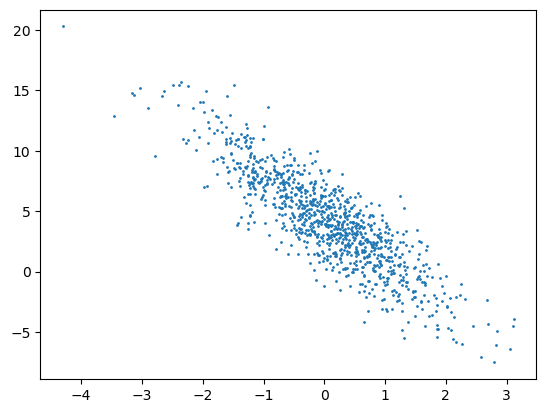

In [67]:
plt.scatter(features[:,1].detach().numpy(),labels.detach().numpy(),1)

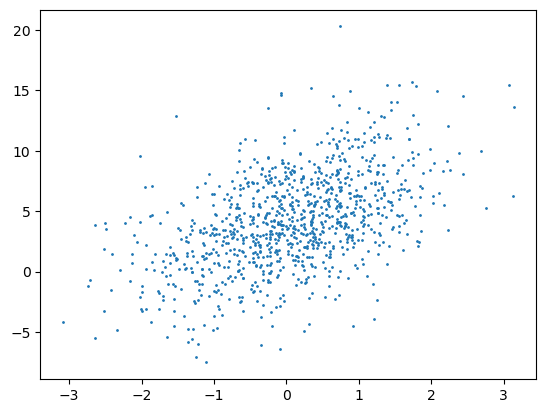

In [68]:
plt.scatter(features[:,0].detach().numpy(),labels.detach().numpy(),1)

In [69]:
tmp=torch.ones(1,2,4)
len(tmp)

1

In [70]:
tmp=torch.arange(12).reshape(3,4)
tmp[[0,2]]

tensor([[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]])

In [71]:
# 读取小批量
def data_iter(batch_size,features,labels):
    num_examples=len(features)
    indices=list(range(num_examples))
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        batch_indices=torch.tensor(indices[i:min(i+batch_size,num_examples)])
        yield features[batch_indices],labels[batch_indices]

In [72]:
batch_size=10
for X,y in data_iter(batch_size,features,labels):
    print(X,'\n',y)
    break

tensor([[ 0.2314, -0.6462],
        [ 0.7220,  0.4633],
        [-0.6889, -0.1675],
        [ 1.5578,  0.3784],
        [ 0.5948,  0.8690],
        [ 1.2186, -0.1752],
        [-0.5975, -1.1498],
        [ 0.1057,  0.1819],
        [ 0.3405,  0.2039],
        [-1.6826,  0.1359]]) 
 tensor([[6.8375],
        [4.0700],
        [3.3749],
        [6.0225],
        [2.4387],
        [7.2407],
        [6.9112],
        [3.7936],
        [4.2079],
        [0.3721]])


In [73]:
# 初始化参数
w=torch.normal(0.0,0.01,size=(2,1),requires_grad=True)
b=torch.zeros(1,requires_grad=True)

In [74]:
def linreg(X,w,b):
    """线性回归模型"""
    return torch.matmul(X,w)+b

In [75]:
def squared_loss(y_hat,y):
    """均方损失"""
    return (y_hat -y.reshape(y_hat.shape))**2/2

In [76]:
def sgd(params,lr,batch_size):
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param-=param.grad*lr/batch_size
            param.grad.zero_()

In [77]:
lr=1
num_epochs=30
net=linreg
loss=squared_loss

for epoch in range(num_epochs):
    for X,y in data_iter(batch_size,features,labels):
        l=loss(net(X,w,b),y)
        l.sum().backward()
        sgd([w,b],lr,batch_size)
    with torch.no_grad():
        train_l=loss(net(features,w,b),labels)
        print(f"epoch {epoch+1}, loss {float(train_l.mean())}")

epoch 1, loss 5.258412056718953e-05
epoch 2, loss 8.432730101048946e-05
epoch 3, loss 4.748323044623248e-05
epoch 4, loss 0.00010624455899232998
epoch 5, loss 5.182379754842259e-05
epoch 6, loss 5.5639775382587686e-05
epoch 7, loss 7.227975584100932e-05
epoch 8, loss 5.525926826521754e-05
epoch 9, loss 6.174115696921945e-05
epoch 10, loss 5.0435177399776876e-05
epoch 11, loss 5.117006003274582e-05
epoch 12, loss 6.734605995006859e-05
epoch 13, loss 4.612060001818463e-05
epoch 14, loss 4.872453791904263e-05
epoch 15, loss 5.152687299414538e-05
epoch 16, loss 5.4185366025194526e-05
epoch 17, loss 6.609407864743844e-05
epoch 18, loss 6.021558147040196e-05
epoch 19, loss 8.492171764373779e-05
epoch 20, loss 5.429517841548659e-05
epoch 21, loss 4.9318561650579795e-05
epoch 22, loss 4.6908800868550315e-05
epoch 23, loss 6.036403283360414e-05
epoch 24, loss 4.952528979629278e-05
epoch 25, loss 6.773696804884821e-05
epoch 26, loss 0.00010900338384089991
epoch 27, loss 5.913548739044927e-05
epo

In [78]:
print(f"w's error:{true_w-w.reshape(true_w.shape)}")
print(f"b's error:{true_b-b}")

w's error:tensor([-0.0077, -0.0026], grad_fn=<SubBackward0>)
b's error:tensor([-0.0014], grad_fn=<RsubBackward1>)


In [79]:
# 线性回归简介实现

In [80]:
import numpy as np
import torch
from torch.utils import data

In [81]:
true_w=torch.tensor([2,-3.4])
true_b=4.2
features,labels=synthetic_data(true_w,true_b,1000)

In [82]:
def load_array(data_arrays,batch_size,is_train=True):
    """构造一个Pytorch数据迭代器"""
    dataset=data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset,batch_size,shuffle=is_train)
    

In [83]:
batch_size=10
data_iter=load_array((features,labels),batch_size)

next(iter(data_iter))

[tensor([[-1.6090,  0.6790],
         [-0.7176,  2.8205],
         [-0.0470, -0.5581],
         [-0.9114,  1.1198],
         [-0.7326,  1.6441],
         [ 0.1618,  1.1905],
         [ 0.3849,  0.5927],
         [ 1.1267, -0.3120],
         [ 0.3351, -0.5607],
         [ 0.4581, -0.7168]]),
 tensor([[-1.3254],
         [-6.8186],
         [ 6.0074],
         [-1.4394],
         [-2.8558],
         [ 0.4725],
         [ 2.9546],
         [ 7.5100],
         [ 6.7895],
         [ 7.5386]])]

In [84]:
from torch import nn

net=nn.Sequential(nn.Linear(2,1))

In [85]:
net[0].weight.data.normal_(0,0.01)
net[0].bias.data.fill_(0)

tensor([0.])

In [86]:
loss=nn.MSELoss()

In [87]:
trainer=torch.optim.SGD(net.parameters(),lr=0.03)

In [88]:
num_epochs=10
for epoch in range(num_epochs):
    for X,y in data_iter:
        l=loss(net(X),y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l=loss(net(features),labels)
    print(f"epoch {epoch+1}, loss {l:f}")

epoch 1, loss 0.000395
epoch 2, loss 0.000100
epoch 3, loss 0.000101
epoch 4, loss 0.000100
epoch 5, loss 0.000100
epoch 6, loss 0.000100
epoch 7, loss 0.000101
epoch 8, loss 0.000100
epoch 9, loss 0.000100
epoch 10, loss 0.000100
